In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
WLDs = pd.read_csv("Worlds 2021 Main Event - Champion Stats - OraclesElixir.csv")

In [3]:
WLDs

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Middle,1,1.2%,1.2%,4.8%,100%,100%,2,2,...,46,467,-2,8.8,25.1%,377,22.1%,20.9%,0.21,0.38
1,Aatrox,Top,2,2.4%,1.2%,4.8%,50%,100%,6,2,...,14,184,-10,7.9,25.0%,260,17.5%,24.0%,0.36,0.22
2,Alistar,Support,5,6.0%,0.0%,6.0%,40%,80%,6,19,...,-44,-77,2.4,0.9,1.9%,121,7.1%,8.4%,1.96,0.34
3,Amumu,Support,1,1.2%,7.2%,8.4%,100%,0%,2,4,...,-39,446,2,0.8,1.8%,155,6.6%,8.8%,1.69,0.34
4,Annie,Middle,2,2.4%,1.2%,3.6%,50%,100%,6,6,...,-345,-457,-14,5.6,16.4%,396,20.1%,16.6%,0.6,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Yone,Middle,1,1.2%,0.0%,1.2%,0%,100%,2,3,...,58,47,1,8.3,24.8%,245,19.7%,25.5%,0.2,0.4
90,Yuumi,Support,15,18.1%,78.3%,96.4%,53%,0%,21,21,...,117,51,-8.4,0.2,1.0%,323,17.6%,9.6%,1.51,0.17
91,Ziggs,ADC,9,10.8%,7.2%,18.1%,33%,78%,21,21,...,-331,0,-6.8,9.1,31.3%,676,36.4%,24.6%,0.42,0.16
92,Zilean,Support,3,3.6%,0.0%,3.6%,67%,100%,1,4,...,10,-222,-2,1.1,2.3%,60,3.6%,9.2%,1.83,0.43


In [4]:
WLDs.columns

Index(['Champion', 'Pos', 'GP', 'P%', 'B%', 'P+B%', 'W%', 'CTR%', 'K', 'D',
       'A', 'KDA', 'KP', 'DTH%', 'FB%', 'GD10', 'XPD10', 'CSD10', 'CSPM',
       'CS%P15', 'DPM', 'DMG%', 'GOLD%', 'WPM', 'WCPM'],
      dtype='object')

In [5]:
WLDs1 = WLDs[WLDs.GP>3]

In [6]:
WLDs1

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
2,Alistar,Support,5,6.0%,0.0%,6.0%,40%,80%,6,19,...,-44,-77,2.4,0.9,1.9%,121,7.1%,8.4%,1.96,0.34
5,Aphelios,ADC,31,37.3%,41.0%,78.3%,61%,48%,115,63,...,128,-47,4.2,9.3,31.2%,444,25.7%,26.4%,0.48,0.32
7,Azir,Middle,10,12.0%,14.5%,26.5%,40%,60%,34,34,...,37,188,9,8.4,25.1%,523,30.0%,22.9%,0.48,0.21
8,Braum,Support,11,13.3%,9.6%,22.9%,36%,100%,4,38,...,-47,-75,2.5,1.1,2.3%,156,9.9%,8.5%,1.67,0.3
9,Camille,Top,7,8.4%,10.8%,19.3%,57%,43%,16,30,...,-346,-397,-19.3,7.6,24.7%,340,19.7%,21.2%,0.4,0.23
10,Draven,ADC,4,4.8%,21.7%,26.5%,25%,50%,11,8,...,166,50,4,9.2,30.9%,317,20.5%,27.9%,0.64,0.33
11,Ezreal,ADC,11,13.3%,9.6%,22.9%,55%,82%,42,23,...,-62,-158,-6.5,8.9,29.0%,569,30.8%,25.2%,0.42,0.21
16,Gnar,Top,8,9.6%,2.4%,12.0%,38%,75%,17,20,...,-139,-24,3,7.9,24.1%,398,24.9%,23.0%,0.48,0.25
19,Gragas,Top,4,4.8%,1.2%,8.4%,50%,75%,13,13,...,-267,-213,-8.8,7.6,26.2%,486,27.4%,21.7%,0.35,0.2
21,Graves,Top,33,39.8%,34.9%,78.3%,64%,9%,102,76,...,33,39,2.6,9.5,30.6%,487,26.9%,26.0%,0.35,0.28


In [7]:
topdata = WLDs1[WLDs1.Pos == 'Top']

In [8]:
topdata1=topdata[['Champion','Pos','GP','W%','P+B%','CTR%','KDA','FB%','GD10','XPD10','CSD10','DPM','DMG%','GOLD%','WPM','WCPM']]

In [9]:
topdata1['W%'] = topdata1['W%'].str.replace('%','')
topdata1['P+B%'] = topdata1['P+B%'].str.replace('%','')
topdata1['CTR%'] = topdata1['CTR%'].str.replace('%','')
topdata1['FB%'] = topdata1['FB%'].str.replace('%','')
topdata1['DMG%'] = topdata1['DMG%'].str.replace('%','')
topdata1['GOLD%'] = topdata1['GOLD%'].str.replace('%','')

<ipython-input-9-552ce5adf7a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topdata1['W%'] = topdata1['W%'].str.replace('%','')
<ipython-input-9-552ce5adf7a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topdata1['P+B%'] = topdata1['P+B%'].str.replace('%','')
<ipython-input-9-552ce5adf7a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [10]:
topdata1['W%']

9     57
16    38
19    50
21    64
22    29
24    20
27    43
28    43
34    73
41    60
58    50
Name: W%, dtype: object

In [11]:
topdata1 = topdata1.astype({'W%':'float','P+B%':'float','CTR%':'float','KDA':'float','FB%':'float','GD10':'float','XPD10':'float','CSD10':'float','DPM':'float','DMG%':'float','GOLD%':'float','WPM':'float','WCPM':'float'})

In [12]:
topdata1

,Champion,Pos,GP,W%,P+B%,CTR%,KDA,FB%,GD10,XPD10,CSD10,DPM,DMG%,GOLD%,WPM,WCPM
9,Camille,Top,7,57.0,19.3,43.0,2.2,43.0,-346.0,-397.0,-19.3,340.0,19.7,21.2,0.40,0.23
16,Gnar,Top,8,38.0,12.0,75.0,2.1,13.0,-139.0,-24.0,3.0,398.0,24.9,23.0,0.48,0.25
19,Gragas,Top,4,50.0,8.4,75.0,3.5,25.0,-267.0,-213.0,-8.8,486.0,27.4,21.7,0.35,0.20
21,Graves,Top,33,64.0,78.3,9.0,3.1,12.0,33.0,39.0,2.6,487.0,26.9,26.0,0.35,0.28
22,Gwen,Top,14,29.0,27.7,50.0,2.1,7.0,-28.0,-3.0,1.7,415.0,26.1,24.9,0.33,0.32
24,Irelia,Top,5,20.0,65.1,80.0,1.0,0.0,-472.0,-364.0,-4.2,264.0,18.3,24.6,0.38,0.17
27,Jax,Top,7,43.0,8.4,86.0,1.9,14.0,-1.0,130.0,0.7,345.0,20.5,24.3,0.39,0.16
28,Jayce,Top,23,43.0,55.4,22.0,2.3,30.0,378.0,157.0,9.3,626.0,34.2,25.6,0.41,0.29
34,Kennen,Top,22,73.0,61.4,50.0,3.3,27.0,-201.0,-122.0,-4.5,510.0,27.7,21.9,0.33,0.23
41,Lucian,Top,5,60.0,78.3,80.0,3.2,40.0,626.0,367.0,13.2,591.0,27.7,25.7,0.54,0.33


In [13]:
list = topdata1[['W%','P+B%','CTR%','KDA','FB%','GD10','XPD10','CSD10','DPM','DMG%','GOLD%','WPM','WCPM']]

In [14]:
list

,W%,P+B%,CTR%,KDA,FB%,GD10,XPD10,CSD10,DPM,DMG%,GOLD%,WPM,WCPM
9,57.0,19.3,43.0,2.2,43.0,-346.0,-397.0,-19.3,340.0,19.7,21.2,0.40,0.23
16,38.0,12.0,75.0,2.1,13.0,-139.0,-24.0,3.0,398.0,24.9,23.0,0.48,0.25
19,50.0,8.4,75.0,3.5,25.0,-267.0,-213.0,-8.8,486.0,27.4,21.7,0.35,0.20
21,64.0,78.3,9.0,3.1,12.0,33.0,39.0,2.6,487.0,26.9,26.0,0.35,0.28
22,29.0,27.7,50.0,2.1,7.0,-28.0,-3.0,1.7,415.0,26.1,24.9,0.33,0.32
24,20.0,65.1,80.0,1.0,0.0,-472.0,-364.0,-4.2,264.0,18.3,24.6,0.38,0.17
27,43.0,8.4,86.0,1.9,14.0,-1.0,130.0,0.7,345.0,20.5,24.3,0.39,0.16
28,43.0,55.4,22.0,2.3,30.0,378.0,157.0,9.3,626.0,34.2,25.6,0.41,0.29
34,73.0,61.4,50.0,3.3,27.0,-201.0,-122.0,-4.5,510.0,27.7,21.9,0.33,0.23
41,60.0,78.3,80.0,3.2,40.0,626.0,367.0,13.2,591.0,27.7,25.7,0.54,0.33


In [15]:
df = pd.DataFrame(list)

In [16]:
corr = df.corr(method = 'pearson')

In [17]:
df.dtypes

W%       float64
P+B%     float64
CTR%     float64
KDA      float64
FB%      float64
GD10     float64
XPD10    float64
CSD10    float64
DPM      float64
DMG%     float64
GOLD%    float64
WPM      float64
WCPM     float64
dtype: object

In [18]:
corr

,W%,P+B%,CTR%,KDA,FB%,GD10,XPD10,CSD10,DPM,DMG%,GOLD%,WPM,WCPM
W%,1.000000,0.274372,-0.361430,0.810913,0.646738,0.258840,0.201136,-0.073025,0.483990,0.295216,-0.240889,0.005342,0.210521
P+B%,0.274372,1.000000,-0.377485,0.196485,0.062534,0.368086,0.252964,0.441074,0.459955,0.353988,0.574100,0.147049,0.385337
CTR%,-0.361430,-0.377485,1.000000,-0.241502,-0.134855,-0.150737,-0.022062,-0.016782,-0.380754,-0.454133,-0.237400,0.368436,-0.451444
KDA,0.810913,0.196485,-0.241502,1.000000,0.532311,0.334295,0.292086,0.091457,0.706578,0.588014,-0.165931,-0.005817,0.349982
FB%,0.646738,0.062534,-0.134855,0.532311,1.000000,0.377369,0.141359,-0.120208,0.516457,0.315007,-0.319049,0.401804,0.280703
GD10,0.258840,0.368086,-0.150737,0.334295,0.377369,1.000000,0.936820,0.834377,0.697808,0.562190,0.649750,0.551707,0.707846
XPD10,0.201136,0.252964,-0.022062,0.292086,0.141359,0.936820,1.000000,0.894492,0.580228,0.477931,0.667560,0.477115,0.582202
CSD10,-0.073025,0.441074,-0.016782,0.091457,-0.120208,0.834377,0.894492,1.000000,0.550086,0.524076,0.815819,0.481672,0.569018
DPM,0.483990,0.459955,-0.380754,0.706578,0.516457,0.697808,0.580228,0.550086,1.000000,0.946062,0.294359,0.261425,0.600169
DMG%,0.295216,0.353988,-0.454133,0.588014,0.315007,0.562190,0.477931,0.524076,0.946062,1.000000,0.283784,0.099284,0.565680


In [19]:
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:>

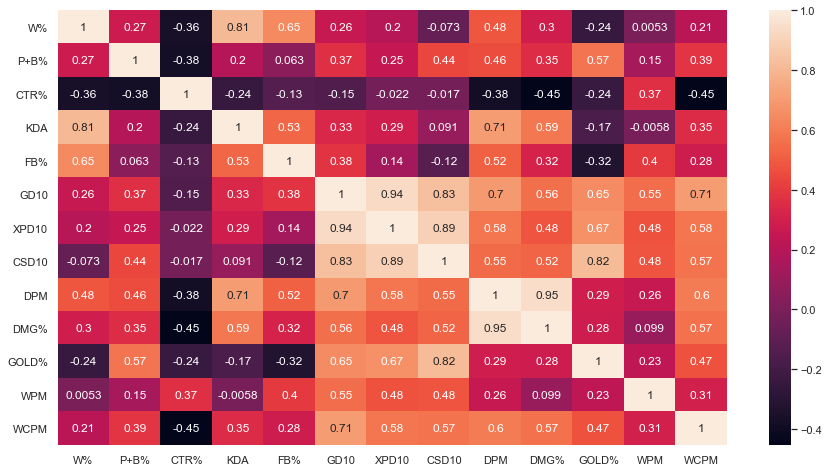

In [21]:
sns.heatmap(corr,annot=True)

In [22]:
plt.show()

In [23]:
list1 = topdata1[['Champion','W%','P+B%','CTR%','KDA','FB%','GD10','XPD10','CSD10','DPM','DMG%','GOLD%','WPM','WCPM']]

In [24]:
list1

,Champion,W%,P+B%,CTR%,KDA,FB%,GD10,XPD10,CSD10,DPM,DMG%,GOLD%,WPM,WCPM
9,Camille,57.0,19.3,43.0,2.2,43.0,-346.0,-397.0,-19.3,340.0,19.7,21.2,0.40,0.23
16,Gnar,38.0,12.0,75.0,2.1,13.0,-139.0,-24.0,3.0,398.0,24.9,23.0,0.48,0.25
19,Gragas,50.0,8.4,75.0,3.5,25.0,-267.0,-213.0,-8.8,486.0,27.4,21.7,0.35,0.20
21,Graves,64.0,78.3,9.0,3.1,12.0,33.0,39.0,2.6,487.0,26.9,26.0,0.35,0.28
22,Gwen,29.0,27.7,50.0,2.1,7.0,-28.0,-3.0,1.7,415.0,26.1,24.9,0.33,0.32
24,Irelia,20.0,65.1,80.0,1.0,0.0,-472.0,-364.0,-4.2,264.0,18.3,24.6,0.38,0.17
27,Jax,43.0,8.4,86.0,1.9,14.0,-1.0,130.0,0.7,345.0,20.5,24.3,0.39,0.16
28,Jayce,43.0,55.4,22.0,2.3,30.0,378.0,157.0,9.3,626.0,34.2,25.6,0.41,0.29
34,Kennen,73.0,61.4,50.0,3.3,27.0,-201.0,-122.0,-4.5,510.0,27.7,21.9,0.33,0.23
41,Lucian,60.0,78.3,80.0,3.2,40.0,626.0,367.0,13.2,591.0,27.7,25.7,0.54,0.33


In [32]:
list2 = topdata1[['Champion','KDA']]

In [33]:
list2

,Champion,KDA
9,Camille,2.2
16,Gnar,2.1
19,Gragas,3.5
21,Graves,3.1
22,Gwen,2.1
24,Irelia,1.0
27,Jax,1.9
28,Jayce,2.3
34,Kennen,3.3
41,Lucian,3.2


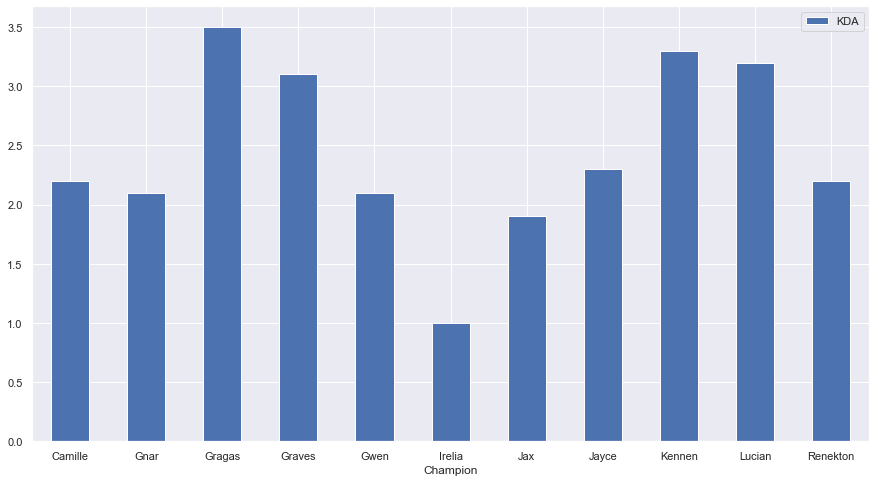

In [34]:
ax = list2.plot.bar(x='Champion',y='KDA',rot=0)

In [40]:
list3 = topdata1[['Champion','KDA','W%']]

In [42]:
list3

,Champion,KDA,W%
9,Camille,2.2,57.0
16,Gnar,2.1,38.0
19,Gragas,3.5,50.0
21,Graves,3.1,64.0
22,Gwen,2.1,29.0
24,Irelia,1.0,20.0
27,Jax,1.9,43.0
28,Jayce,2.3,43.0
34,Kennen,3.3,73.0
41,Lucian,3.2,60.0


In [76]:
list3['Champion'].unique()

array(['Camille', 'Gnar', 'Gragas', 'Graves', 'Gwen', 'Irelia', 'Jax',
       'Jayce', 'Kennen', 'Lucian', 'Renekton'], dtype=object)

([<matplotlib.axis.XTick at 0x22074c04ca0>,
 [Text(0, 0, 'Camille'),
  Text(1, 0, 'Gnar'),
  Text(2, 0, 'Gragas'),
  Text(3, 0, 'Graves'),
  Text(4, 0, 'Gwen'),
  Text(5, 0, 'Irelia'),
  Text(6, 0, 'Jax'),
  Text(7, 0, 'Jayce'),
  Text(8, 0, 'Kennen'),
  Text(9, 0, 'Lucian'),
  Text(10, 0, 'Renekton')])

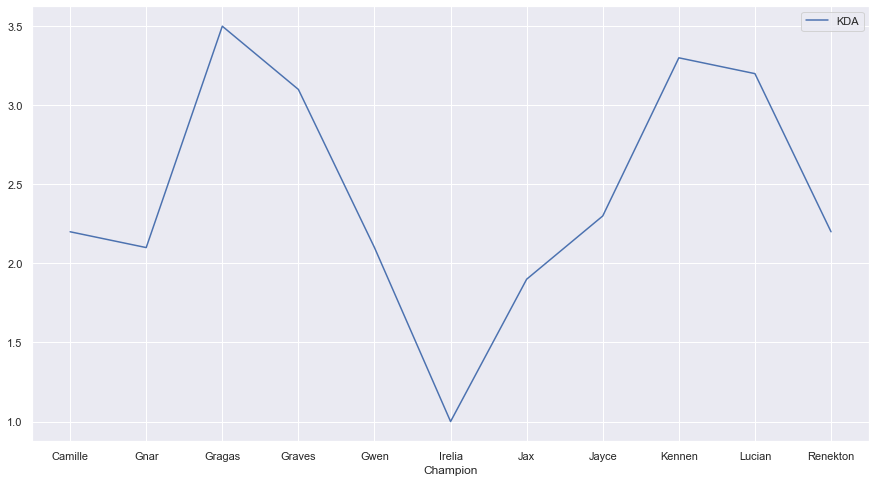

In [82]:
ax2 = list3.plot(x='Champion',y='KDA',rot=0)
plt.xticks(range(len(list3)),list3['Champion'].unique())

In [65]:
ax3 = ax2.twinx()

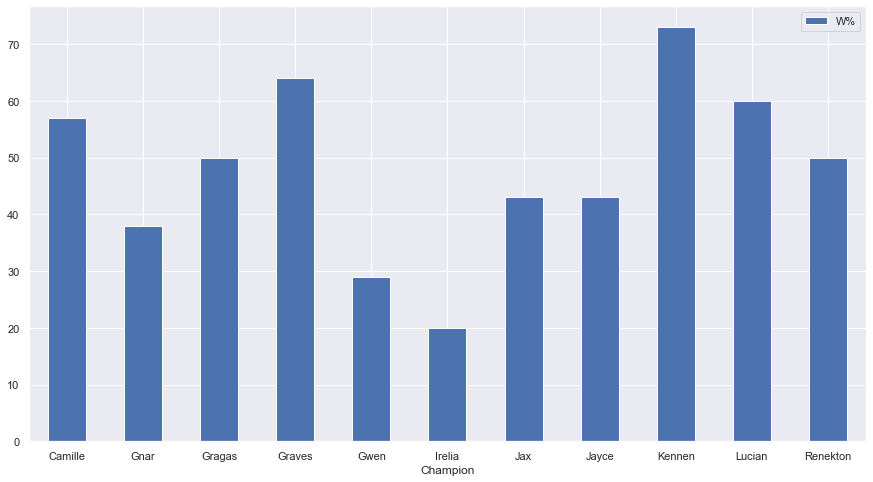

In [60]:
ax3 =list3.plot.bar(x='Champion',y='W%',rot=0)